In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
joblist_path = '../../demo3/Q3_joblist.xlsx'
resume_path = '../../demo3/resume_duplicate.xlsx'

joblist_match_path = '../../demo4/岗位匹配度.csv'
resume_match_path = '../../demo4/求职者满意度.csv'
resume_type = {'招聘信息 ID': str, '求职者 ID': str}

In [3]:
resume_inf = pd.read_excel(joblist_path, dtype={'id': str})
joblist_inf = pd.read_excel(joblist_path, dtype={'id': str})

resume_match = pd.read_csv(resume_match_path, dtype=resume_type)  # 求职者满意度
joblist_match = pd.read_csv(joblist_match_path, dtype=resume_type)  # 岗位匹配度

In [4]:
resume_inf.head()

,index,id,enterpriseName,positionName,willNature,minimumWage,maximumWage,payMethod,exp,exp_min,...,job_personScope,job_recruitJobNum,job_registCapi,job_introduction,job_totalPublicJobNum,job_email,job_phone,deadline,concatenated,jobRequiredments_keywords
0,1,1374177417123467264,广东泰迪智能科技股份有限公司,新媒体运营助理,全职,5000,9000,月薪,1-3年,1,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","日常, 账号, 负责, 运营, 工作, 基本操作, 品牌, 媒体, 微信, 知乎, ps, ..."
1,2,1374177686322286592,广东泰迪智能科技股份有限公司,数据产品经理,全职,12500,25000,月薪,3-5年,3,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-29,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","产品, 原型, 高校, 优先, 设计, 研发, 文档, 产品设计, 线上, 经验, 工作, ..."
2,3,1374181407047421952,广东泰迪智能科技股份有限公司,软件测试工程师,全职,6000,9000,月薪,1-3年,1,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-11-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","测试, linux, 编写, 脚本, 熟悉, 测试工具, 测试用例, bug, bug, 沟..."
3,4,1374197032360742912,广东泰迪智能科技股份有限公司,数据分析实习生,实习,3000,3600,月薪,经验不限,0,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","大数据, 泰迪, 培训, 计算机相关, 数据分析挖掘, 数学建模, kaggle, 实训, ..."
4,5,1461584951286824960,广州思迈特软件有限公司,bi实施工程师,全职,9000,12000,月薪,经验不限,0,...,500-1000人,2,100-200万,NaN,2,simaite@tipdm.com,12345678901,2021-12-08,"广州思迈特软件有限公司，简称思迈特，所属行业数据服务,计算机软件，公司性质合资，，岗位bi实...","bi, 岗位, smart, bi, 数据仓库, 2022, 专业本科, 数据库知识, sq..."


In [5]:
joblist_inf.head()

,index,id,enterpriseName,positionName,willNature,minimumWage,maximumWage,payMethod,exp,exp_min,...,job_personScope,job_recruitJobNum,job_registCapi,job_introduction,job_totalPublicJobNum,job_email,job_phone,deadline,concatenated,jobRequiredments_keywords
0,1,1374177417123467264,广东泰迪智能科技股份有限公司,新媒体运营助理,全职,5000,9000,月薪,1-3年,1,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","日常, 账号, 负责, 运营, 工作, 基本操作, 品牌, 媒体, 微信, 知乎, ps, ..."
1,2,1374177686322286592,广东泰迪智能科技股份有限公司,数据产品经理,全职,12500,25000,月薪,3-5年,3,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-29,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","产品, 原型, 高校, 优先, 设计, 研发, 文档, 产品设计, 线上, 经验, 工作, ..."
2,3,1374181407047421952,广东泰迪智能科技股份有限公司,软件测试工程师,全职,6000,9000,月薪,1-3年,1,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-11-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","测试, linux, 编写, 脚本, 熟悉, 测试工具, 测试用例, bug, bug, 沟..."
3,4,1374197032360742912,广东泰迪智能科技股份有限公司,数据分析实习生,实习,3000,3600,月薪,经验不限,0,...,150-500人,7,500-1000万,教育部授权1+X大数据应用开发（Python）职业技能等级认证，工信部教考中心授权的工业和信...,10,services@tipdm.com,15874516854,2021-12-30,"广东泰迪智能科技股份有限公司，简称泰迪科技，所属行业互联网,计算机软件，公司性质民营公司，企...","大数据, 泰迪, 培训, 计算机相关, 数据分析挖掘, 数学建模, kaggle, 实训, ..."
4,5,1461584951286824960,广州思迈特软件有限公司,bi实施工程师,全职,9000,12000,月薪,经验不限,0,...,500-1000人,2,100-200万,NaN,2,simaite@tipdm.com,12345678901,2021-12-08,"广州思迈特软件有限公司，简称思迈特，所属行业数据服务,计算机软件，公司性质合资，，岗位bi实...","bi, 岗位, smart, bi, 数据仓库, 2022, 专业本科, 数据库知识, sq..."


C:\Users\diaobaole\AppData\Local\Temp\ipykernel_16804\2136777208.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, bins=10, hist=True, kde=False, norm_hist=False,
c:\Users\diaobaole\scoop\apps\miniconda3\current\envs\NLPS\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25307 (\N{CJK UNIFIED IDEOGRAPH-62DB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\diaobaole\scoop\apps\miniconda3\current\envs\NLPS\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32856 (\N{CJK UNIFIED IDEOGRAPH-8058}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\User

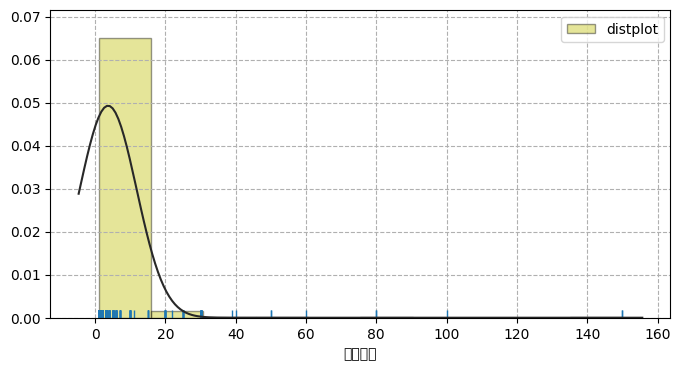

In [203]:

import matplotlib.pyplot as plt
# 直方图
from scipy.stats import norm #使用直方图和最大似然高斯分布拟合绘制分布

#该代码判断确定不限人数的招聘人数设置为3，通过分布图和中位数确定，并将不限人数替换成3，然后将这一列转为int类型

count_l = [int(item) for item in joblist_inf['position_count'] if item != "不限人数"]
type(count_l[0])

import seaborn as sns


rs = np.random.RandomState(50)  # 设置随机数种子
s = pd.Series(rs.randn(100)*100)

s = count_l
plt.figure(figsize=(8,4))
sns.distplot(s, bins=10, hist=True, kde=False, norm_hist=False,
            rug=True, vertical=False,label='distplot',
            axlabel='招聘人数',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)
# 用标准正态分布拟合
plt.legend()
plt.grid(linestyle='--')
plt.show()

median_count = np.median(count_l)

In [6]:
resume_match

,招聘信息 ID,求职者 ID,求职者满意度
0,1374177417123467264,7531755679844593172,0.407952
1,1374177686322286592,7531755679844593172,0.407420
2,1374181407047421952,7531755679844593172,0.450267
3,1461587935500566528,7531755679844593172,0.539639
4,1461589090033074176,7531755679844593172,0.388788
...,...,...,...
12427995,1631112859985510400,7539911534976888340,0.463880
12427996,1648165203080253440,7539911534976888340,0.387278
12427997,1648165203080253441,7539911534976888340,0.430486
12427998,1648165203084447744,7539911534976888340,0.451837


In [7]:
resume_match_job = resume_match[['招聘信息 ID', '求职者 ID', '求职者满意度']].copy()
resume_match_job.columns = ['job_id', 'resume_id', 'ratio']
joblist_match_resume = joblist_match[['招聘信息 ID', '求职者 ID', '岗位匹配度']].copy()
joblist_match_resume.columns = ['job_id', 'resume_id', 'ratio']
resume_match_job

,job_id,resume_id,ratio
0,1374177417123467264,7531755679844593172,0.407952
1,1374177686322286592,7531755679844593172,0.407420
2,1374181407047421952,7531755679844593172,0.450267
3,1461587935500566528,7531755679844593172,0.539639
4,1461589090033074176,7531755679844593172,0.388788
...,...,...,...
12427995,1631112859985510400,7539911534976888340,0.463880
12427996,1648165203080253440,7539911534976888340,0.387278
12427997,1648165203080253441,7539911534976888340,0.430486
12427998,1648165203084447744,7539911534976888340,0.451837


In [8]:
joblist_match_resume

,job_id,resume_id,ratio
0,1374177417123467264,7532228383945190932,0.179483
1,1374177417123467264,7532228388240158228,0.179483
2,1374177417123467264,7534846114972495380,0.179483
3,1374177417123467264,7536134046815546900,0.179483
4,1374177417123467264,7536477334961581588,0.179483
...,...,...,...
12427995,1648165203084447745,7539825601271229972,0.328510
12427996,1648165203084447745,7539868568124059156,0.335788
12427997,1648165203084447745,7539868623958634004,0.362252
12427998,1648165203084447745,7539911526386953748,0.330646


In [9]:
# #列名中英文切换，用于合作完成代码
# def col_cn2eng(joblist_match_copy):
#     joblist_match_copy.columns = ['job_id', 'resume_id', 'ratio']
#     return joblist_match_copy

# def col_eng2cn(joblist_match_copy):
#     joblist_match_copy.columns = ['招聘信息 ID.1','求职者 ID','知识图谱匹配度归一化']
#     return joblist_match_copy

# #索引和列名切换，用户合作完成代码
# def col_2_idx(fixed_joblist_inf):
#     if len(fixed_joblist_inf.columns) == 5:
#         fixed_joblist_inf.columns = ['id', 'position_count', 'fixed_count', 'minus_count', 'rest_position']
#         fixed_joblist_inf.set_index('id', inplace=True)

# def idx_2_col(fixed_joblist_inf):
#     if len(fixed_joblist_inf.columns) == 4:
#         fixed_joblist_inf.reset_index(inplace=True)
#         fixed_joblist_inf.columns = ['job_id', 'position_count', 'fixed_count', 'minus_count', 'rest_position']




def jobOriginal_to_offer(joblist_match_resume, fixed_joblist_inf, threshold = 0.3):
    """
    joblist_match_resume:一个岗位对于各简历的匹配度
    joblist_inf:从数据库取出的岗位信息，包含岗位id以及该岗位要招聘的人数

    设计一个函数，根据joblist_match的匹配度，找出前n（n为该岗位id在joblist_inf中对应的岗位人数）个简历id

    return：返回一个dataframe，包含岗位id，其发放的简历id列表，以及该岗位id的招聘人数
    """

    job_id_list = []
    resume_id_list = []
    rest_position_count = []

    for i in range(len(fixed_joblist_inf)):
        job_id = fixed_joblist_inf['job_id'][i]
        n = fixed_joblist_inf['rest_position'][i]
        picked_df = joblist_match_resume[joblist_match_resume['job_id'] == job_id]
        if len(joblist_match_resume[joblist_match_resume['job_id'] == job_id]) > 0 and n > 0:
            picked_df = picked_df.nlargest(n, 'ratio')
            #设置阈值
            picked_df = picked_df[picked_df['ratio'] > threshold].drop(columns=['ratio'])
            if len(picked_df) > 0:
                resume_l = picked_df['resume_id'].to_list()
                job_id_list.append(job_id)
                resume_id_list.append(resume_l)
                rest_position_count.append(n)
    offer_df = pd.DataFrame({'job_id':job_id_list, 'resume_id':resume_id_list, 'rest_position_count':rest_position_count})
    return offer_df


def offer_to_acept(offer_df, resume_match_job, threshold=.3):
    """
    offer_df: 岗位offer发放信息表，包含岗位id，接受到该岗位id发送的简历id（列表形式），以及该岗位的招聘人数
    resumeOriginal: 一简历id对各岗位id的满意度
    threshold: 满意度阈值，即小于这个阈值，简历id即使接受到offer也不接受

    设计一个函数，
    第一步：先将offer_df中一个岗位i对应多个简历id的形式转换为对应的一个简历第对应多个岗位id的形式，记为acept_df
    第二步：根据resumeOriginal中的满意度信息，找到acept_df中简历id对应的满意度（ratio）最大的岗位id和对应的满意度，并加入到acept_df中

    return: 返回一个datafrmae，包含简历id，以及发送给该简历id的岗位id列表，满意度最高的岗位id以及满意度
    """
    expanded_df = offer_df.explode('resume_id')
    acept_df = expanded_df.groupby('resume_id')['job_id'].apply(list).reset_index()

    def get_max_ratio_job_id(resume_id, job_ids):
        df_filtered = resume_match_job[(resume_match_job['resume_id'] == resume_id) & (resume_match_job['job_id'].isin(job_ids))]
        max_ratio_index = df_filtered['ratio'].idxmax()
        return df_filtered.loc[max_ratio_index]['job_id'], df_filtered.loc[max_ratio_index]['ratio']
    print(len(acept_df))
    if len(acept_df) > 0:
        # 应用函数
        acept_df['max_ratio_data'] = acept_df.apply(lambda row: get_max_ratio_job_id(row['resume_id'], row['job_id']), axis=1)
            # 过滤ratio大于0.3的结果，并将其分割为job_id和ratio两列
        acept_df[['max_ratio_job_id', 'max_ratio']] = pd.DataFrame(acept_df['max_ratio_data'].tolist(), index=acept_df.index)
        acept_df = acept_df[acept_df['max_ratio'] > threshold].drop(columns=['max_ratio_data'])    
    return acept_df


def acept_fix_original(acept_df, fixed_joblist_inf, resume_match_job, joblist_match_resume):
    """
    fixed_joblist_inf: 一个dataframe，包含了岗位id，岗位招聘人数（fixed_count），已经招聘到的人数（minus_count），还剩下的岗位数（rest_position）
    acept_df: 一个datafrmae，包含简历id，以及发送给该简历id的岗位id列表，满意度最高的岗位id以及满意度
    resumeOrignal: 一个dataframe，包含一简历id对各岗位id的满意度

    设计一个函数，根据acept_df对resumeOriginal进行更新，对fixed_joblist_inf进行更新
    """
    acept_resumeIds = acept_df['resume_id']
    #先用acept_df中的resumeId对resumeOriginal进行更新，删除已经接受offer的resumeId，因为岗位id对应的position_count是大于等于1的数，有一个resumeId接受offer，还是有机会继续招人
    resume_match_job = resume_match_job.loc[~resume_match_job['resume_id'].isin(acept_resumeIds), :]

    #在用acept_df中的resumeId对jobOriginal进行更新，删除已经接受offer的resumeId，同上
    joblist_match_resume = joblist_match_resume.loc[~joblist_match_resume['resume_id'].isin(acept_resumeIds), :]

    #对岗位的剩余情况进行计算
    counts = acept_df.max_ratio_job_id.value_counts()
    minus_job = pd.DataFrame({'job_id': counts.index, 'minus_count1': counts.values})
    fixed_joblist_inf = pd.merge(fixed_joblist_inf, minus_job ,on="job_id", how='left')
    fixed_joblist_inf.fillna(0, inplace=True)
    fixed_joblist_inf['minus_count']  = fixed_joblist_inf['minus_count'] + fixed_joblist_inf['minus_count1']
    fixed_joblist_inf.drop('minus_count1',axis = 1,inplace=True)
    fixed_joblist_inf['rest_position'] = fixed_joblist_inf['fixed_count'] - fixed_joblist_inf['minus_count']
    fixed_joblist_inf['minus_count'] = fixed_joblist_inf['minus_count'].apply(int)
    fixed_joblist_inf['rest_position'] = fixed_joblist_inf['rest_position'].apply(int)
    return fixed_joblist_inf, resume_match_job, joblist_match_resume



In [10]:
#根据之前确定的将“不限人数”转化为3，生成fixed_joblist_inf，并重新生成索引，将原来的id索引变为新的列'job_id', 第一次生成fixed_joblist_inf
fixed_position_count = [int(item) if item != "不限人数" else 3 for item in joblist_inf['position_count']]
fixed_joblist_inf = joblist_inf[['id','position_count']].copy()
fixed_joblist_inf.columns = ['job_id', 'position_count']
fixed_joblist_inf['fixed_count'] = fixed_position_count
fixed_joblist_inf['minus_count'] = 0
fixed_joblist_inf['rest_position'] = fixed_joblist_inf['fixed_count'] - fixed_joblist_inf['minus_count']
fixed_joblist_inf


,job_id,position_count,fixed_count,minus_count,rest_position
0,1374177417123467264,1,1,0,1
1,1374177686322286592,2,2,0,2
2,1374181407047421952,1,1,0,1
3,1374197032360742912,3,3,0,3
4,1461584951286824960,不限人数,3,0,3
...,...,...,...,...,...
1567,1631112859985510400,2,2,0,2
1568,1648165203080253440,100,100,0,100
1569,1648165203080253441,10,10,0,10
1570,1648165203084447744,6,6,0,6


In [11]:
fixed_joblist_inf

,job_id,position_count,fixed_count,minus_count,rest_position
0,1374177417123467264,1,1,0,1
1,1374177686322286592,2,2,0,2
2,1374181407047421952,1,1,0,1
3,1374197032360742912,3,3,0,3
4,1461584951286824960,不限人数,3,0,3
...,...,...,...,...,...
1567,1631112859985510400,2,2,0,2
1568,1648165203080253440,100,100,0,100
1569,1648165203080253441,10,10,0,10
1570,1648165203084447744,6,6,0,6


In [12]:
fixed_joblist_inf.sum()

job_id            1374177417123467264137417768632228659213741814...
position_count    1213不限人数不限人数不限人数不限人数不限人数不限人数不限人数不限人数不限人数不限人数40...
fixed_count                                                    5764
minus_count                                                       0
rest_position                                                  5764
dtype: object

In [14]:
while True:

    offer_df = jobOriginal_to_offer(joblist_match_resume, fixed_joblist_inf, threshold=0.5)
    acept_df = offer_to_acept(offer_df,resume_match_job, threshold=0.5)
    if len(acept_df) > 0:
        fixed_joblist_inf, resume_match_job, joblist_match_resume = acept_fix_original(acept_df, fixed_joblist_inf, resume_match_job, joblist_match_resume)
    else:
        break
    print(fixed_joblist_inf[['minus_count']].sum())


KeyboardInterrupt: 

In [254]:
fixed_joblist_inf[['minus_count']].sum()

minus_count    167
dtype: int64

In [229]:
offer_df

,job_id,resume_id,rest_position_count
0,1374177417123467264,[1582598236647063552],1
1,1374181407047421952,[1582598236647063552],1
2,1461584951286824960,"[1462716135081377792, 1467789372454731776, 146...",3
3,1461585230782660608,"[1468155960865456128, 1467789372454731776]",2
4,1461587935500566528,"[1582598236647063552, 1470316546227306496, 146...",3
...,...,...,...
729,1594673737184182272,"[1470307492838899712, 1468155960865456128, 147...",16
730,1599949951281004544,"[1470307492838899712, 1630852451164880896, 158...",3
731,1603244028852305920,[1501850256562847744],1
732,1629824814967554048,[1493072448155942912],1


,resume_id,job_id,max_ratio_job_id,max_ratio
0,1462716135081377792,"[1461584951286824960, 1462698431867912192, 146...",1506179537359208452,0.894244
1,1463446413584236544,"[1462710211658776576, 1470933264645619712, 148...",1482185001910009856,1.000000
2,1467789372454731776,"[1461584951286824960, 1461585230782660608, 146...",1482194288887595008,1.000000
3,1467790182290948096,"[1463388714267967488, 1468518592176848896, 146...",1463388714267967488,0.883209
4,1467792600214929408,"[1482185001901621250, 1482194903416045580, 152...",1482194903416045580,0.854888
5,1467797054184095744,"[1461589362696388608, 1461595991152132096, 146...",1482194288883400706,1.000000
6,1468110505502703616,"[1463338880194445312, 1463339842803990528, 146...",1463339842803990528,1.000000
7,1468143289352978432,[1541254101239726080],1541254101239726080,0.705978
8,1468155960865456128,"[1461584951286824960, 1461585230782660608, 146...",1461595991152132096,0.991973
9,1469222105404014592,"[1461593160642854912, 1522786179542548480, 152...",1461593160642854912,1.000000


In [177]:
resume_match_job

,job_id,resume_id,ratio
0,1374177417123467264,1461512488951611392,0.578714
1,1374177686322286592,1461512488951611392,0.395168
2,1374181407047421952,1461512488951611392,0.591245
3,1461584951286824960,1461512488951611392,0.196004
4,1461585230782660608,1461512488951611392,0.196004
...,...,...,...
63620,1569585390216675328,1647579226406256640,1.000000
63621,1574927900380102656,1647579226406256640,0.000500
63622,1574928422227017728,1647579226406256640,0.000500
63623,1574931491241197568,1647579226406256640,0.000500


In [178]:
joblist_match_resume

,job_id,resume_id,ratio
0,1374177417123467264,1461512488951611392,1.000000
1,1374177417123467264,1461518932425965568,0.243527
2,1374177417123467264,1461534785997504512,0.708858
3,1374177417123467264,1462685278807392256,0.198303
4,1374177417123467264,1471283827795165184,0.590244
...,...,...,...
63620,1631112859985510400,1631126636327993344,0.253453
63621,1631112859985510400,1631135062105915392,0.258814
63622,1631112859985510400,1631491020585828352,0.385684
63623,1631112859985510400,1632947816114552832,0.325354


In [156]:


acept_resumeIds
counts
minus_job

,job_id,minus_count1
0,1516228514095955968,7
1,1594673737184182272,4
2,1541254101239726081,4
3,1542028331946475520,4
4,1462710211658776576,3
...,...,...
97,1522088865739964418,1
98,1482192956965388298,1
99,1526028377780256769,1
100,1547141682221416448,1


TypeError: only size-1 arrays can be converted to Python scalars

In [157]:
fixed_joblist_inf

,job_id,position_count,fixed_count,minus_count,rest_position
0,1374177417123467264,1,1,0,1
1,1374177686322286592,2,2,0,2
2,1374181407047421952,1,1,0,1
3,1374197032360742912,3,3,0,3
4,1461584951286824960,不限人数,3,0,3
...,...,...,...,...,...
1567,1631112859985510400,2,2,4,-2
1568,1648165203080253440,100,100,0,100
1569,1648165203080253441,10,10,0,10
1570,1648165203084447744,6,6,0,6


In [87]:
acept_df

,resume_id,job_id,max_ratio_job_id,max_ratio
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 146...",1482185001905815555,1.000000
1,1461518932425965568,"[1462710211658776576, 1473562073186304000, 148...",1552975408276832256,0.952590
2,1461530285551255552,"[1462695954653249536, 1462710211658776576, 146...",1482176795087339520,1.000000
3,1461534785997504512,"[1374177686322286592, 1461584951286824960, 146...",1482192956961193990,1.000000
4,1461601893229920256,"[1514089434499383296, 1516228514095955968]",1514089434499383296,0.697674
...,...,...,...,...
143,1643560323032154112,"[1471752599282778112, 1482184364296110081, 148...",1482195175144030220,1.000000
144,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156...",1566973716963917824,1.000000
145,1645422304206913536,"[1462672316990357504, 1483722281619423232, 149...",1613439889204969472,1.000000
146,1647012656068034560,"[1491313565926293504, 1493066715620311040, 156...",1603244028852305920,1.000000


In [108]:
acept_df

,resume_id,job_id,max_ratio_job_id,max_ratio
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 146...",1482185001905815555,1.000000
1,1461518932425965568,"[1462710211658776576, 1473562073186304000, 148...",1552975408276832256,0.952590
2,1461530285551255552,"[1462695954653249536, 1462710211658776576, 146...",1482176795087339520,1.000000
3,1461534785997504512,"[1374177686322286592, 1461584951286824960, 146...",1482192956961193990,1.000000
4,1461601893229920256,"[1514089434499383296, 1516228514095955968]",1514089434499383296,0.697674
...,...,...,...,...
143,1643560323032154112,"[1471752599282778112, 1482184364296110081, 148...",1482195175144030220,1.000000
144,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156...",1566973716963917824,1.000000
145,1645422304206913536,"[1462672316990357504, 1483722281619423232, 149...",1613439889204969472,1.000000
146,1647012656068034560,"[1491313565926293504, 1493066715620311040, 156...",1603244028852305920,1.000000


In [71]:
offer_df
threshold = 0.3
expanded_df = offer_df.explode('resume_id')
acept_df = expanded_df.groupby('resume_id')['job_id'].apply(list).reset_index()

def get_max_ratio_job_id(resume_id, job_ids):
    df_filtered = resume_match_job[(resume_match_job['resume_id'] == resume_id) & (resume_match_job['job_id'].isin(job_ids))]
    max_ratio_index = df_filtered['ratio'].idxmax()
    return df_filtered.loc[max_ratio_index]['job_id'], df_filtered.loc[max_ratio_index]['ratio']

# 应用函数
acept_df['max_ratio_data'] = acept_df.apply(lambda row: get_max_ratio_job_id(row['resume_id'], row['job_id']), axis=1)
    # 过滤ratio大于0.3的结果，并将其分割为job_id和ratio两列
acept_df[['max_ratio_job_id', 'max_ratio']] = pd.DataFrame(acept_df['max_ratio_data'].tolist(), index=acept_df.index)
acept_df = acept_df[acept_df['max_ratio'] > threshold].drop(columns=['max_ratio_data'])    
acept_df

,resume_id,job_id,max_ratio_job_id,max_ratio
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 146...",1482185001905815555,1.000000
1,1461518932425965568,"[1462710211658776576, 1473562073186304000, 148...",1552975408276832256,0.952590
2,1461530285551255552,"[1462695954653249536, 1462710211658776576, 146...",1482176795087339520,1.000000
3,1461534785997504512,"[1374177686322286592, 1461584951286824960, 146...",1482192956961193990,1.000000
4,1461601893229920256,"[1514089434499383296, 1516228514095955968]",1514089434499383296,0.697674
...,...,...,...,...
143,1643560323032154112,"[1471752599282778112, 1482184364296110081, 148...",1482195175144030220,1.000000
144,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156...",1566973716963917824,1.000000
145,1645422304206913536,"[1462672316990357504, 1483722281619423232, 149...",1613439889204969472,1.000000
146,1647012656068034560,"[1491313565926293504, 1493066715620311040, 156...",1603244028852305920,1.000000


815

,job_id,resume_id,rest_position_count
0,1374177417123467264,[1461512488951611392],1
1,1374177686322286592,"[1461534785997504512, 1461512488951611392]",2
6,1461587935500566528,"[1469199771200782336, 1470203287771938816, 146...",3
15,1462695954653249536,"[1471662236597616640, 1473584370802622464, 147...",10
17,1462710211658776576,"[1471283827795165184, 1491717866792288256, 147...",50
...,...,...,...
1496,1564134750673829888,[1461512488951611392],2
1499,1565240659105939456,"[1461530285551255552, 1461534785997504512, 150...",5
1505,1567747885691437056,[1461512488951611392],1
1517,1582578771930775552,"[1461512488951611392, 1643560323032154112, 150...",3


In [80]:
a = 'a'

a in ['a', 'b']

True

,招聘信息 ID,Unnamed: 1,招聘信息 ID.1,求职者 ID,知识图谱匹配度,知识图谱匹配度归一化
0,1374177417123467264,0,1374177417123467264,1461512488951611392,0.090909,1.000000
1,NaN,1,1374177417123467264,1461518932425965568,0.046154,0.243527
2,NaN,4,1374177417123467264,1461534785997504512,0.073684,0.708858
3,NaN,12,1374177417123467264,1462685278807392256,0.043478,0.198303
4,NaN,113,1374177417123467264,1471283827795165184,0.066667,0.590244
...,...,...,...,...,...,...
63620,NaN,2914813,1631112859985510400,1631126636327993344,0.035211,0.253453
63621,NaN,2914814,1631112859985510400,1631135062105915392,0.035714,0.258814
63622,NaN,2914816,1631112859985510400,1631491020585828352,0.047619,0.385684
63623,NaN,2914818,1631112859985510400,1632947816114552832,0.041958,0.325354


In [234]:
1648165203084447744  6个

,position_count,fixed_count,minus_count,rest_position
id,,,,
1461585230782660608,不限人数,3,1,2
1461589090033074176,不限人数,3,3,0
1461595991152132096,不限人数,3,1,2
1462710211658776576,50,50,3,47
1463066895702949888,不限人数,3,1,2
...,...,...,...,...
1603244028852305920,3,3,1,2
1613431494808829952,不限人数,3,1,2
1613439183576236032,不限人数,3,2,1


In [206]:
acept_df

,resume_id,job_id,max_ratio_job_id,max_ratio
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 146...",1482185001905815555,1.000000
1,1461518932425965568,"[1462710211658776576, 1473562073186304000, 148...",1552975408276832256,0.952590
2,1461530285551255552,"[1462695954653249536, 1462710211658776576, 146...",1482176795087339520,1.000000
3,1461534785997504512,"[1374177686322286592, 1461584951286824960, 146...",1482192956961193990,1.000000
4,1461601893229920256,"[1514089434499383296, 1516228514095955968]",1514089434499383296,0.697674
...,...,...,...,...
143,1643560323032154112,"[1471752599282778112, 1482184364296110081, 148...",1482195175144030220,1.000000
144,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156...",1566973716963917824,1.000000
145,1645422304206913536,"[1462672316990357504, 1483722281619423232, 149...",1613439889204969472,1.000000
146,1647012656068034560,"[1491313565926293504, 1493066715620311040, 156...",1603244028852305920,1.000000


In [205]:
idx_2_col(fixed_joblist_inf)
counts = acept_df.max_ratio_job_id.value_counts()
minus_job = pd.DataFrame({'job_id': counts.index, 'minus_count1': counts.values})

fixed_joblist_inf = pd.merge(fixed_joblist_inf, minus_job ,on="job_id", how='inner')

fixed_joblist_inf.fillna(0, inplace=True)
fixed_joblist_inf['minus_count']  = fixed_joblist_inf['minus_count'] + fixed_joblist_inf['minus_count1']
fixed_joblist_inf.drop('minus_count1',axis = 1,inplace=True)
fixed_joblist_inf['rest_position'] = fixed_joblist_inf['fixed_count'] - fixed_joblist_inf['minus_count']


fixed_joblist_inf



,job_id,position_count,fixed_count,minus_count,rest_position
0,1461585230782660608,不限人数,3,1,2
1,1461589090033074176,不限人数,3,3,0
2,1461595991152132096,不限人数,3,1,2
3,1462710211658776576,50,50,3,47
4,1463066895702949888,不限人数,3,1,2
...,...,...,...,...,...
97,1603244028852305920,3,3,1,2
98,1613431494808829952,不限人数,3,1,2
99,1613439183576236032,不限人数,3,2,1
100,1613439889204969472,不限人数,3,1,2


In [202]:


fixed_joblist_inf

,job_id,position_count,fixed_count,minus_count,rest_position
0,1461585230782660608,不限人数,3,4,3
1,1461589090033074176,不限人数,3,12,3
2,1461595991152132096,不限人数,3,4,3
3,1462710211658776576,50,50,12,50
4,1463066895702949888,不限人数,3,4,3
...,...,...,...,...,...
97,1603244028852305920,3,3,4,3
98,1613431494808829952,不限人数,3,4,3
99,1613439183576236032,不限人数,3,8,3
100,1613439889204969472,不限人数,3,4,3


In [9]:
import pandas as pd

# 创建示例数据
data1 = {'求职者 ID.1': [1374177417123467264, 1374177686322286592],
         '招聘信息 ID': [['1461512488951611392', '1507237125567938560'],
                         ['1461512488951611392', '1374177686322286592']]}

df1 = pd.DataFrame(data1)

data2 = {'求职者 ID.1': [1374177417123467264, 1374177417123467264, 1374177417123467264, 1374177686322286592, 1374177686322286592, 1374177686322286592, 1374177686322286572, 1374177686322286572, 1374177686322286572],
         '招聘信息 ID': ['1461512488951611392', '1507237125567938560', '1374177686322286592', '1461512488951611392', '1374177686322286592', '1507237125567938560', '1461512488951611392', '1374177686322286592', '1507237125567938560'],
         '知识图谱匹配度归一化': [0.1, 0.3, 0.7, 0.4, 0.3, 0.8, 0.4, 0.3, 0.8]}
df2 = pd.DataFrame(data2)

# df1 = acept_df
# df2 = resume_match_copy

# 定义一个函数，用于找到具有最大ratio的job_id
def get_max_ratio_job_id(resume_id, job_ids):
    df_filtered = df2[(df2['求职者 ID.1'] == resume_id) & (df2['招聘信息 ID'].isin(job_ids))]
    max_ratio_index = df_filtered['知识图谱匹配度归一化'].idxmax()
    return df_filtered.loc[max_ratio_index]['招聘信息 ID'], df_filtered.loc[max_ratio_index]['知识图谱匹配度归一化']

# 应用函数
df1['max_ratio_data'] = df1.apply(lambda row: get_max_ratio_job_id(row['求职者 ID.1'], row['招聘信息 ID']), axis=1)

# 过滤ratio大于0.3的结果，并将其分割为job_id和ratio两列
df1[['max_ratio_招聘信息 ID', 'max_ratio_知识图谱匹配度归一化']] = pd.DataFrame(df1['max_ratio_data'].tolist(), index=df1.index)
df1 = df1[df1['max_ratio_知识图谱匹配度归一化'] > 0.3].drop(columns=['max_ratio_data'])

print(df1)




              求职者 ID.1                                     招聘信息 ID  \
1  1374177686322286592  [1461512488951611392, 1374177686322286592]   

     max_ratio_招聘信息 ID  max_ratio_知识图谱匹配度归一化  
1  1461512488951611392                   0.4  


In [11]:
resume_match_copy.columns = ['job_id', 'resume_id', 'ratio']
acept_df.columns = ['resume_id', 'job_id']
acept_df

,resume_id,job_id
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 137..."
1,1461518932425965568,"[1374177686322286592, 1374181407047421952, 147..."
2,1461530285551255552,"[1374177686322286592, 1462710211658776576, 146..."
3,1461534785997504512,"[1374177417123467264, 1374177686322286592, 137..."
4,1461601893229920256,"[1506179537359208448, 1506179537359208449, 150..."
...,...,...
141,1643560323032154112,"[1374177417123467264, 1374177686322286592, 137..."
142,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156..."
143,1645422304206913536,"[1506097472634748928, 1506097472634748929, 150..."
144,1647012656068034560,[1558010601740042240]


In [12]:
import pandas as pd

# 创建示例数据
data1 = {'resume_id': [1374177417123467264, 1374177686322286592],
         'job_id': [['1461512488951611392', '1507237125567938560'],
                    ['1461512488951611392', '1374177686322286592']]}

df1 = pd.DataFrame(data1)

data2 = {'resume_id': [1374177417123467264, 1374177417123467264, 1374177417123467264, 1374177686322286592, 1374177686322286592, 1374177686322286592, 1374177686322286572, 1374177686322286572, 1374177686322286572],
         'job_id': ['1461512488951611392', '1507237125567938560', '1374177686322286592', '1461512488951611392', '1374177686322286592', '1507237125567938560', '1461512488951611392', '1374177686322286592', '1507237125567938560'],
         'ratio': [0.1, 0.3, 0.7, 0.4, 0.3, 0.8, 0.4, 0.3, 0.8]}
df2 = pd.DataFrame(data2)


df1 = acept_df
df2 = resume_match_copy

# 定义一个函数，用于找到具有最大ratio的job_id
def get_max_ratio_job_id(resume_id, job_ids):
    df_filtered = df2[(df2['resume_id'] == resume_id) & (df2['job_id'].isin(job_ids))]
    max_ratio_index = df_filtered['ratio'].idxmax()
    return df_filtered.loc[max_ratio_index]['job_id'], df_filtered.loc[max_ratio_index]['ratio']

# 应用函数
df1['max_ratio_data'] = df1.apply(lambda row: get_max_ratio_job_id(row['resume_id'], row['job_id']), axis=1)

# 过滤ratio大于0.3的结果，并将其分割为job_id和ratio两列
df1[['max_ratio_job_id', 'max_ratio']] = pd.DataFrame(df1['max_ratio_data'].tolist(), index=df1.index)
df1 = df1[df1['max_ratio'] > 0.3].drop(columns=['max_ratio_data'])


,resume_id,job_id,max_ratio_job_id,max_ratio
0,1461512488951611392,"[1374177417123467264, 1374177686322286592, 137...",1482185001905815555,1.000000
1,1461518932425965568,"[1374177686322286592, 1374181407047421952, 147...",1552975408276832256,0.952590
2,1461530285551255552,"[1374177686322286592, 1462710211658776576, 146...",1482176795087339520,1.000000
3,1461534785997504512,"[1374177417123467264, 1374177686322286592, 137...",1482192956961193990,1.000000
4,1461601893229920256,"[1506179537359208448, 1506179537359208449, 150...",1506179537359208452,0.719796
...,...,...,...,...
140,1640319370922164224,"[1480819048261484544, 1492018398631165952, 149...",1574966005363507200,1.000000
141,1643560323032154112,"[1374177417123467264, 1374177686322286592, 137...",1482195175144030220,1.000000
142,1645385086935367680,"[1558010601740042240, 1565544666676461568, 156...",1566973716963917824,1.000000
143,1645422304206913536,"[1506097472634748928, 1506097472634748929, 150...",1613439889204969472,1.000000


In [296]:
import pandas as pd

# 创建示例DataFrame
df = pd.DataFrame({'group': ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C'], 
                   'ID': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'],
                   'ratio': [0.8, 0.7, 0.9, 0.4, 0.5, 0.6, 0.7, 0.3, 0.2, 0.1, 0.5, 0.4]})





# 选择每个组中ratio列的前三个最大值，以及对应的ID列的值
n = 3
top_n_values = (df.groupby('group')
                 .apply(lambda x: x.nlargest(n, 'ratio'))
                 .reset_index(drop=True)[['group', 'ID', 'ratio']])

# 输出结果
print(top_n_values)


  group ID  ratio
0     A  c    0.9
1     A  a    0.8
2     A  b    0.7
3     B  g    0.7
4     B  f    0.6
5     B  e    0.5
6     C  k    0.5
7     C  l    0.4
8     C  h    0.3


In [299]:
joblist_match_copy.drop('匹配度排序', axis=1, inplace=True)
joblist_match_copy.columns = ['job_id', 'resume_id', 'ratio']


KeyError: "['匹配度排序'] not found in axis"

In [310]:



joblist_match_copy.columns = ['job_id', 'resume_id', 'ratio']

hahaha = joblist_match_copy.groupby('job_id').apply(lambda x : x.nlargest(4, 'ratio'))


,job_id,resume_id,ratio
9,1374177417123467264,1582598236647063552,0.147328
11,1374177417123467264,1632947816114552832,0.042265
27,1374181407047421952,1582598236647063552,0.202466
29,1374181407047421952,1632947816114552832,0.000500
48,1461584951286824960,1462716135081377792,0.634272
...,...,...,...
63606,1631112859985510400,1493788610879684608,0.201146
63613,1631112859985510400,1530030540420415488,0.095696
63618,1631112859985510400,1630852451164880896,0.098696
63621,1631112859985510400,1631135062105915392,0.258814


In [303]:
top_n_values = (joblist_match_copy.groupby('job_id')
                 .apply(lambda x: x.nlargest(n, 'ratio'))
                 .reset_index(drop=True)[['job_id', 'resume_id', 'ratio']])


top_n_values

,job_id,resume_id,ratio
0,1374177417123467264,1582598236647063552,0.147328
1,1374177417123467264,1632947816114552832,0.042265
2,1374181407047421952,1582598236647063552,0.202466
3,1374181407047421952,1632947816114552832,0.000500
4,1461584951286824960,1462716135081377792,0.634272
...,...,...,...
1883,1631112859897430016,1473849820266496000,0.516136
1884,1631112859897430016,1470957711746269184,0.462058
1885,1631112859985510400,1472772112841310208,0.593443
1886,1631112859985510400,1493072448155942912,0.577028


In [321]:
joblist_match_l = joblist_match[['招聘信息 ID.1', '求职者 ID', '知识图谱匹配度归一化']].copy()
joblist_match_l.columns = ['job_id', 'resume_id', 'ratio']

demo_df = joblist_match_l[joblist_match_l['job_id'] == "1374177417123467264"]

demo_df.nlargest(3, 'ratio')



,job_id,resume_id,ratio
0,1374177417123467264,1461512488951611392,1.000000
5,1374177417123467264,1507237125567938560,0.763602
7,1374177417123467264,1554782002648055808,0.749470
